# Where should a drinks company run promotions?

## 📖 Background
Your company owns a chain of stores across Russia that sell a variety of alcoholic drinks. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful.

### The data
The marketing team has sourced you with historical sales volumes per capita for several different drinks types.

- "year" - year (1998-2016)
- "region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
- "wine" - sale of wine in litres by year per capita
- "beer" - sale of beer in litres by year per capita
- "vodka" - sale of vodka in litres by year per capita
- "champagne" - sale of champagne in litres by year per capita
- "brandy" - sale of brandy in litres by year per capita

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_csv(r'./data/russian_alcohol_consumption.csv')
print(df.head())
print(df.tail())

   year              region  wine  beer  vodka  champagne  brandy
0  1998  Republic of Adygea   1.9   8.8    3.4        0.3     0.1
1  1998          Altai Krai   3.3  19.2   11.3        1.1     0.1
2  1998         Amur Oblast   2.1  21.2   17.3        0.7     0.4
3  1998  Arkhangelsk Oblast   4.3  10.6   11.7        0.4     0.3
4  1998    Astrakhan Oblast   2.9  18.0    9.5        0.8     0.2
      year                          region  wine  beer  vodka  champagne  \
1610  2016                Chuvash Republic   5.0  42.3    7.7        0.7   
1611  2016       Chukotka Autonomous Okrug   3.9  34.0   11.6        1.8   
1612  2016        Sakha (Yakutia) Republic   4.3  56.1    8.2        1.8   
1613  2016  Yamalo-Nenets Autonomous Okrug   4.5  75.8    8.2        1.7   
1614  2016                Yaroslavl Oblast  10.2  38.0    8.9        1.4   

      brandy  
1610     0.4  
1611     1.1  
1612     0.5  
1613     1.3  
1614     1.0  


## 💪 Competition challenge

1. Recommend 10 additional regions they should select for the promotion.
2. Tell the story that supports your recommendations.

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 30%       | <ul><li>Quality of recommendations - how clear and well presented the recommendation is.</li><li>Validity of recommendation - is it a fair thing to conclude from the data?</li><li>Number of insights found.</li></ul>       |
| **Storytelling**  | 30%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in depth enough but also concise.</li></ul> |
| **Visualisations** | 20% | <ul><li>Appropriateness of visualisation used.</li><li>Clarity of insight from visualisation.</li></ul> |
| **Votes** | 20% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
*(hint: Press "share" to publish your workbook. Make sure your workbook is set to Public Access)*
- Rename the title of this workbook to make it descriptive of your work.
- Remove redundant cells like the judging criteria so the workbook is focussed on your story.
- Make sure the workbook reads well and explains how you found your insights.

## ⌛️ Time is ticking. Good luck!

In [ ]:
df.shape

(1615, 7)

In [ ]:
df.isna().sum()

year          0
region        0
wine         63
beer         58
vodka        61
champagne    63
brandy       66
dtype: int64

**It has the same nan values and takes up a little of the whole data so I choose the method is to delete the rows with nan**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(1549, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1549 non-null   int64  
 1   region     1549 non-null   object 
 2   wine       1549 non-null   float64
 3   beer       1549 non-null   float64
 4   vodka      1549 non-null   float64
 5   champagne  1549 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 96.8+ KB


In [ ]:
df.describe()

,year,wine,beer,vodka,champagne,brandy
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000
mean,2007.019367,5.638528,51.517205,11.854939,1.315526,0.526998
std,5.489208,2.806004,25.183890,5.097104,0.796938,0.400201
min,1998.000000,0.100000,1.000000,0.400000,0.100000,0.000000
25%,2002.000000,3.600000,32.600000,8.400000,0.800000,0.200000
50%,2007.000000,5.400000,50.100000,11.500000,1.200000,0.400000
75%,2012.000000,7.400000,67.500000,15.000000,1.680000,0.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000


**Description shows you that std and mean in bear column is higher than other columns alcohol**

In [ ]:
df.describe(include=['O'])

,region
count,1549
unique,84
top,Novosibirsk Oblast
freq,19


**Region unique=84**

**Most region is Novgorod Oblast (have freq=19)**

**----------------------------------------------------------------------------------------------------------------**

In [ ]:
alcohol = np.array(df.columns)[2:]

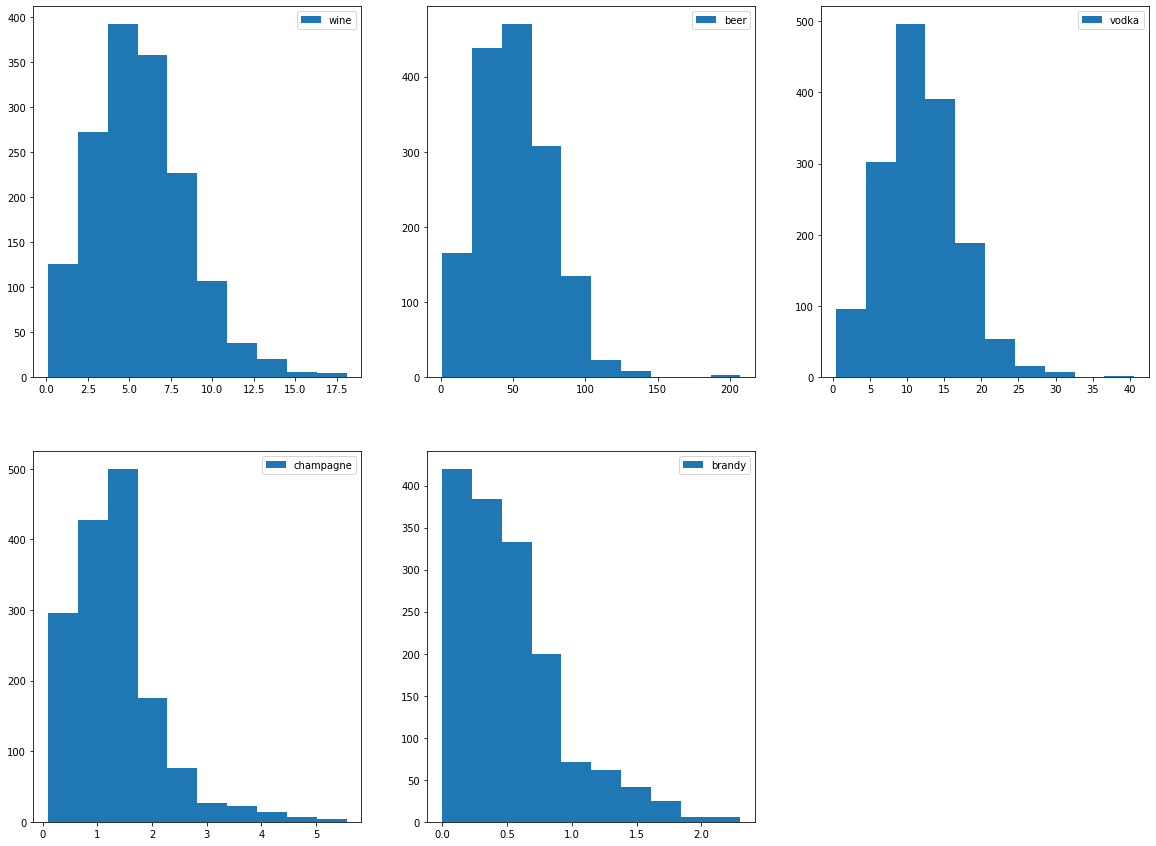

In [ ]:
i=1
plt.figure(figsize=(20,15))
for j in alcohol:
    plt.subplot(2,3,i)
    plt.hist(df[j], label=j)
    i+=1
    plt.legend()
plt.show()

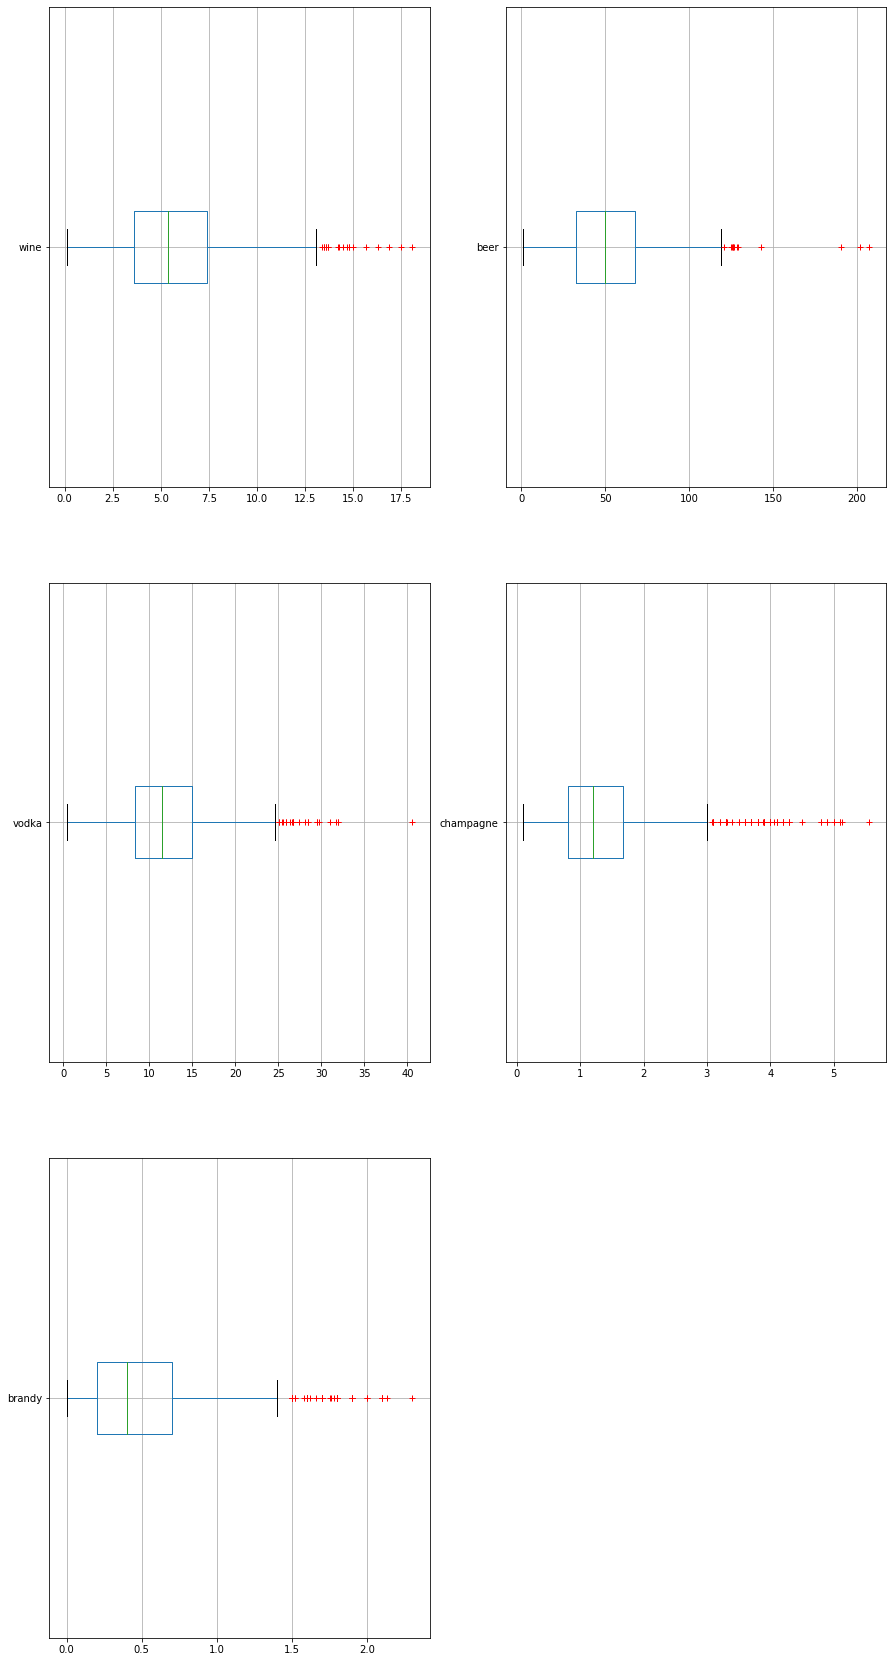

In [ ]:
i=1
plt.figure(figsize=(15,30))
for j in alcohol:
    plt.subplot(3,2,i)
    df.boxplot([j], vert=0, sym='r+')
    i+=1
    
plt.show()

**When i plot histogram, the frequency of occurrence of the set is major skewed to the left**

**To have a better view, I draw one more boxplot chart**

   * You can see all kinds of alcoholic drinks have outlier value but if you look at the beer column you can see the beer cloumn have few oulier compared to the remaining columns
   * In addition, the beer column sale of beer in liters by year per capita usually sell more than the rest of the columns
   * The rest of the columns have lower IQR than the beer and outlier columns indicating many years of high selling based on the number of liters of buyers.
   > It can be seen that the beer column will be less promotional because beer tends to buy a lot over the years

**----------------------------------------------------------------------------------------------------------------**

**Change column year to type string**

In [ ]:
df['year'] = df['year'].astype(str)

**----------------------------------------------------------------------------------------------------------------**

**Here I analyze the region each year that has alcohol columns in the top 10**

**To find the 10 best regions for promotion I will visualize 10 best region in 2016 and take 10 best regions 2016 to visualize from 1998 to 2016**

In [ ]:
df_regionlen = len(df['region'].unique())
df_regionlen

84

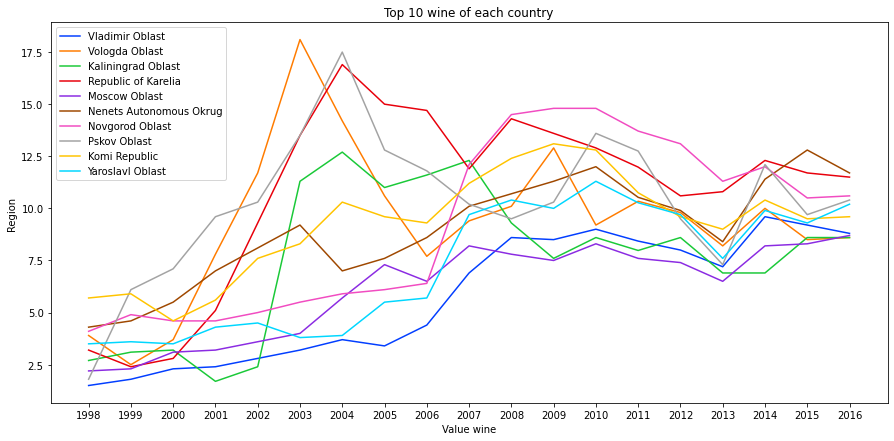

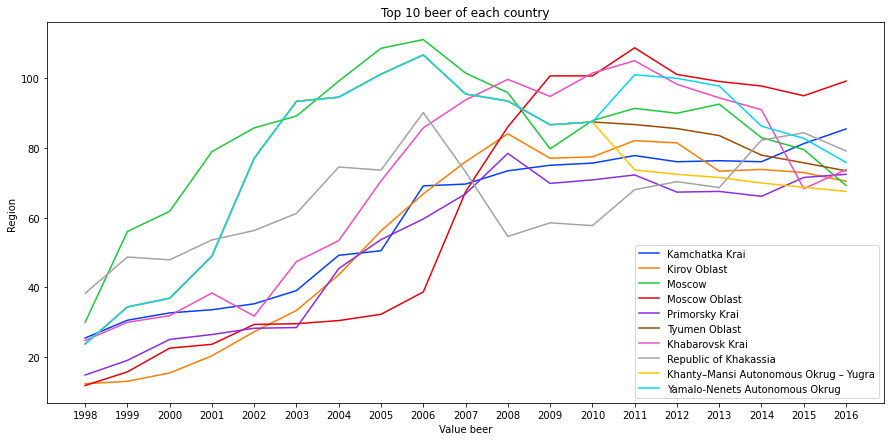

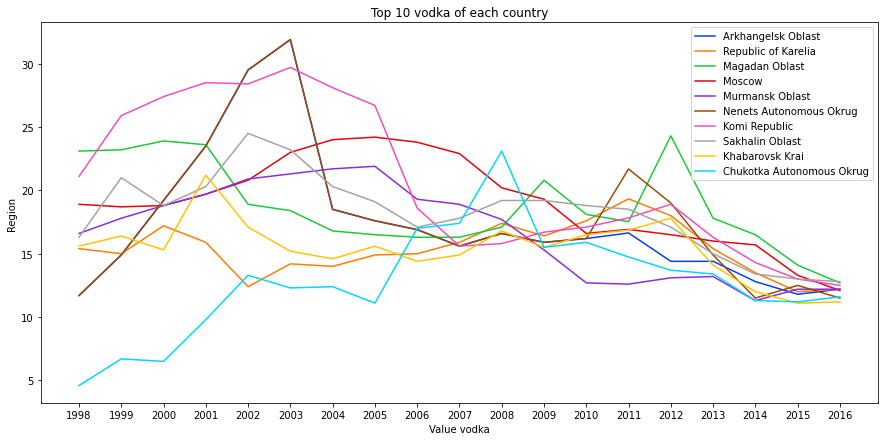

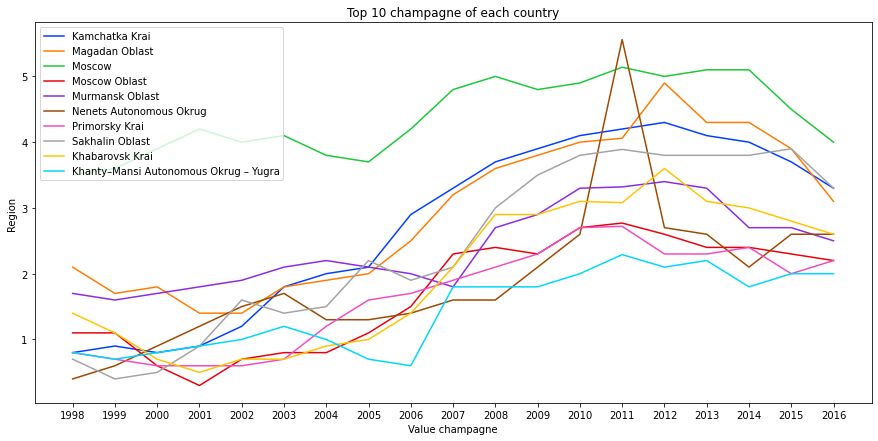

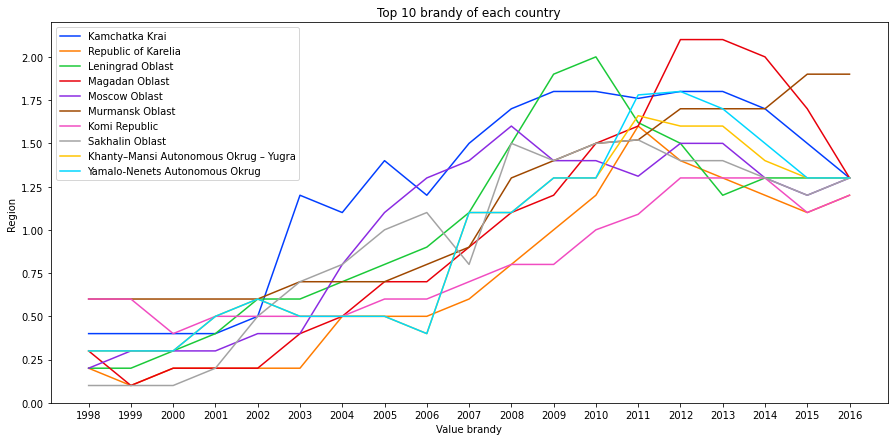

In [68]:

for i in alcohol:
#     if i >= '2014':
#         df_top10 = df[['year','region','wine']].loc[df['year']==i].sort_values(by='wine', ascending=False)[:10]
        df_top10 =  df[df['year']=='2016'].sort_values(by=i, ascending=False)[:10]
        top10_region = df_top10['region'].unique()
        top10_region_alcohol = df[df['region'].isin(top10_region)][['year','region',i]]

        plt.figure(figsize=(15,7))
        ax = sns.lineplot(data=top10_region_alcohol, x='year', y=i,hue='region', palette='bright')
        plt.title("Top 10 "+ i +" of each country")
        ax.set_xlabel(xlabel = 'Value '+i, fontsize = 10)
        ax.set_ylabel(ylabel = 'Region', fontsize = 10)
        ax.legend(prop={'size': 10})
        plt.show()

**First, let's look at the wine chart. We can perform promotion wine on 4 regions is Moscow Oblast, Yaroslavl Oblast, Republic Oblast, Nenets Autonomous Okrug because these regions are trending up, except Nenets Autonomous Okrug is trending down but its value in 2016 is still higher than other regions, the decrease of this area is not much so we can still perfrom promotion for this regions**

**Second, let's look at the beer chart. We can perform promotion beer on 2 regions is Moscow Oblast, Kamchatka Krai because 2 regions are trending up**

**Third, let's look at the vodka chart. We can't perform promotion because there isn't region have trending up**

**Fourth, let's look at the champage chart. We can perform promotion champage on Moscow region. Although it's on a downward trend but sale of champagne in litres by year per capita still high**

**Fifth, let's look at the Brandy chart. We can perform promotion Brandy on Murmansk Oblast, Sakhalin Oblast, Komi Republic are trending up**